In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/datasets/4glass.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]
y_test = df_test.iloc[:, -1:]

In [ ]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)


DecisionTreeClassifier()

[Text(0.7891264320785597, 0.9642857142857143, 'x[7] <= 0.34\ngini = 0.733\nsamples = 142\nvalue = [48, 50, 13, 8, 5, 18]'),
 Text(0.630626022913257, 0.8928571428571429, 'x[3] <= 1.405\ngini = 0.678\nsamples = 124\nvalue = [48, 49, 13, 7, 5, 2]'),
 Text(0.49038461538461536, 0.8214285714285714, 'x[6] <= 10.425\ngini = 0.598\nsamples = 80\nvalue = [45, 21, 10, 1, 2, 1]'),
 Text(0.38666121112929625, 0.75, 'x[2] <= 3.865\ngini = 0.551\nsamples = 72\nvalue = [45, 14, 10, 0, 2, 1]'),
 Text(0.25777414075286414, 0.6785714285714286, 'x[0] <= 1.517\ngini = 0.497\nsamples = 66\nvalue = [45, 9, 9, 0, 2, 1]'),
 Text(0.07855973813420622, 0.6071428571428571, 'x[4] <= 72.72\ngini = 0.681\nsamples = 12\nvalue = [2, 4, 5, 0, 1, 0]'),
 Text(0.05237315875613748, 0.5357142857142857, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0, 0]'),
 Text(0.10474631751227496, 0.5357142857142857, 'x[0] <= 1.516\ngini = 0.656\nsamples = 8\nvalue = [2, 4, 1, 0, 1, 0]'),
 Text(0.05237315875613748, 0.4642857142857143, 'x[5]

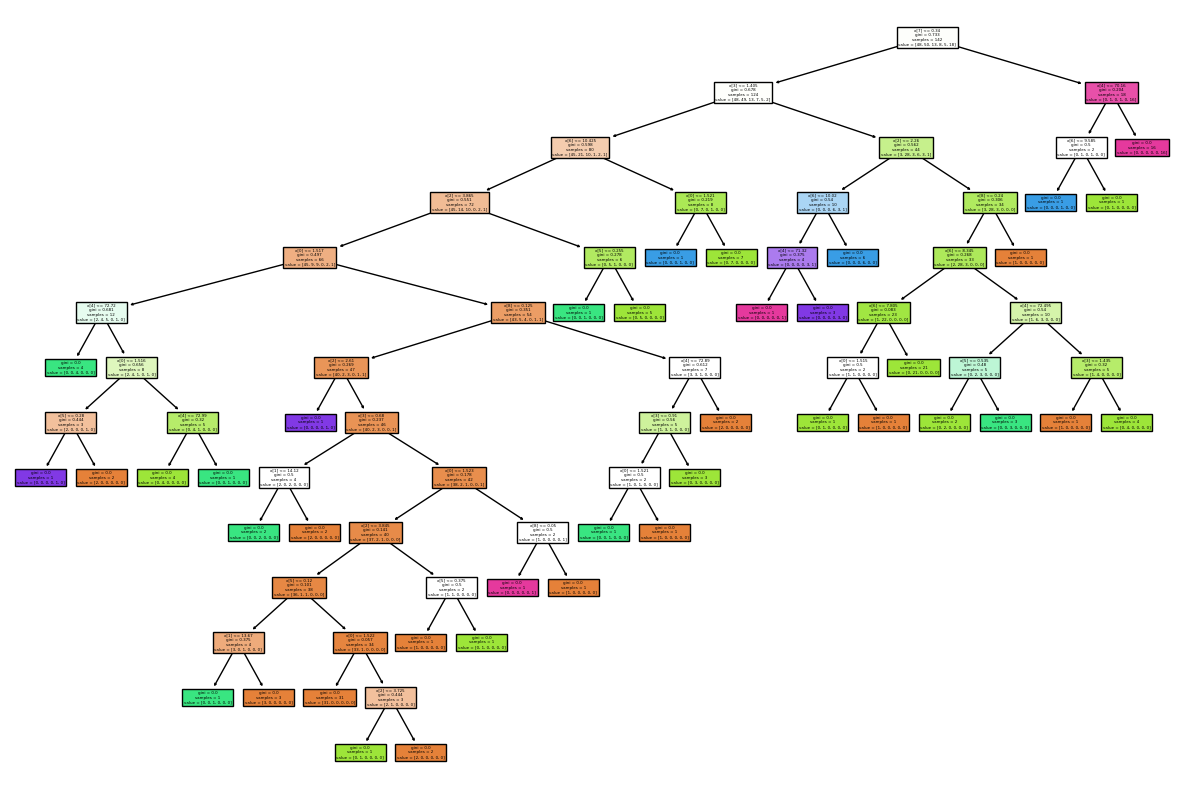

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred,y_test):.6f}')

accuracy: 0.619718


# Default Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           1       0.57      0.60      0.59        20
           2       0.62      0.70      0.65        23
           3       0.50      0.33      0.40         6
           5       0.40      0.40      0.40         5
           6       0.25      1.00      0.40         1
           7       0.91      0.62      0.74        16

    accuracy                           0.61        71
   macro avg       0.54      0.61      0.53        71
weighted avg       0.64      0.61      0.61        71



In [ ]:
treemodel_post_pruning = DecisionTreeClassifier(max_depth=3)
treemodel_post_pruning.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
treemodel_post_pruning.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

[Text(0.5769230769230769, 0.875, 'x[7] <= 0.34\ngini = 0.733\nsamples = 142\nvalue = [48, 50, 13, 8, 5, 18]'),
 Text(0.3076923076923077, 0.625, 'x[3] <= 1.405\ngini = 0.678\nsamples = 124\nvalue = [48, 49, 13, 7, 5, 2]'),
 Text(0.15384615384615385, 0.375, 'x[6] <= 10.425\ngini = 0.598\nsamples = 80\nvalue = [45, 21, 10, 1, 2, 1]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.551\nsamples = 72\nvalue = [45, 14, 10, 0, 2, 1]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [0, 7, 0, 1, 0, 0]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 2.26\ngini = 0.562\nsamples = 44\nvalue = [3, 28, 3, 6, 3, 1]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.54\nsamples = 10\nvalue = [0, 0, 0, 6, 3, 1]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.306\nsamples = 34\nvalue = [3, 28, 3, 0, 0, 0]'),
 Text(0.8461538461538461, 0.625, 'x[4] <= 70.16\ngini = 0.204\nsamples = 18\nvalue = [0, 1, 0, 1, 0, 16]'),
 Text(0.7692307692307693, 0.375, 'x[6] <= 9.585\ngini = 0.5\nsamples = 2\nval

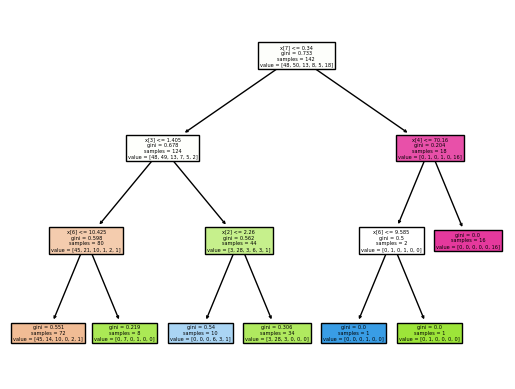

In [ ]:
tree.plot_tree(treemodel_post_pruning,filled=True)


In [ ]:
y_pred_post_pruning =treemodel_post_pruning.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_post_pruning,y_test):.6f}')


accuracy: 0.676056


# Post Pruning Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred_post_pruning,y_test))

              precision    recall  f1-score   support

           1       0.76      0.62      0.68        26
           2       0.65      0.71      0.68        24
           3       0.00      0.00      0.00         0
           5       1.00      0.50      0.67        10
           6       0.00      0.00      0.00         0
           7       0.91      0.91      0.91        11

    accuracy                           0.68        71
   macro avg       0.55      0.46      0.49        71
weighted avg       0.78      0.68      0.71        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treemodel_pre_pruninig=DecisionTreeClassifier()
cv=GridSearchCV(treemodel_pre_pruninig,param_grid=parameter,cv=5,scoring='accuracy')


In [ ]:
cv.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
y_pred_pre_pruning=cv.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_pre_pruning,y_test):.6f}')

accuracy: 0.577465


# PrePruning Decision Tree Report

In [ ]:
print(classification_report(y_pred_pre_pruning,y_test))


              precision    recall  f1-score   support

           1       0.57      0.57      0.57        21
           2       0.69      0.58      0.63        31
           3       0.00      0.00      0.00         0
           5       0.40      0.29      0.33         7
           6       0.25      1.00      0.40         1
           7       0.73      0.73      0.73        11

    accuracy                           0.58        71
   macro avg       0.44      0.53      0.44        71
weighted avg       0.63      0.58      0.60        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
treemodel_cost_complexity=DecisionTreeClassifier()
path = treemodel_cost_complexity.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
ccp_alphas

array([0.        , 0.00658115, 0.00673607, 0.00704225, 0.00704225,
       0.00938967, 0.01056338, 0.01126761, 0.01126761, 0.01156942,
       0.01173709, 0.0121016 , 0.01214564, 0.01214968, 0.01232394,
       0.01435881, 0.01631455, 0.01877934, 0.02053991, 0.02746479,
       0.03837376, 0.04510955, 0.06278527, 0.08089608, 0.11506507])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 3 with ccp_alpha: 0.11506506858811516


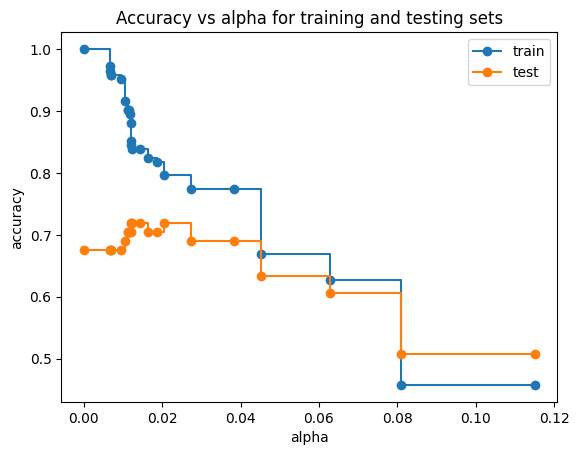

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
treemodel_cost_complexity = DecisionTreeClassifier(random_state=0, ccp_alpha=0.024)
treemodel_cost_complexity.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.024, random_state=0)

[Text(0.7, 0.9166666666666666, 'x[7] <= 0.34\ngini = 0.733\nsamples = 142\nvalue = [48, 50, 13, 8, 5, 18]'),
 Text(0.6, 0.75, 'x[3] <= 1.405\ngini = 0.678\nsamples = 124\nvalue = [48, 49, 13, 7, 5, 2]'),
 Text(0.4, 0.5833333333333334, 'x[6] <= 10.425\ngini = 0.598\nsamples = 80\nvalue = [45, 21, 10, 1, 2, 1]'),
 Text(0.3, 0.4166666666666667, 'x[2] <= 3.865\ngini = 0.551\nsamples = 72\nvalue = [45, 14, 10, 0, 2, 1]'),
 Text(0.2, 0.25, 'x[0] <= 1.517\ngini = 0.497\nsamples = 66\nvalue = [45, 9, 9, 0, 2, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.681\nsamples = 12\nvalue = [2, 4, 5, 0, 1, 0]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.351\nsamples = 54\nvalue = [43, 5, 4, 0, 1, 1]'),
 Text(0.4, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 1, 0, 0, 0]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.219\nsamples = 8\nvalue = [0, 7, 0, 1, 0, 0]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 2.26\ngini = 0.562\nsamples = 44\nvalue = [3, 28, 3, 6, 3, 1]'),
 Text(0.7, 0.4166666666666667, 'x[1

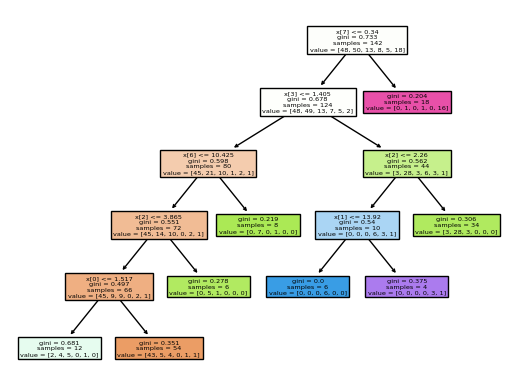

In [ ]:
tree.plot_tree(treemodel_cost_complexity,filled=True)

In [ ]:
y_pred_cost_complexity=treemodel_cost_complexity.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred_cost_complexity,y_test):.6f}')


accuracy: 0.718310


# Cost Complexity Decision Tree Report

In [ ]:
print(classification_report(y_pred_cost_complexity,y_test))

              precision    recall  f1-score   support

           1       0.71      0.68      0.70        22
           2       0.65      0.71      0.68        24
           3       0.50      0.50      0.50         4
           5       1.00      0.71      0.83         7
           6       0.50      0.67      0.57         3
           7       0.91      0.91      0.91        11

    accuracy                           0.72        71
   macro avg       0.71      0.70      0.70        71
weighted avg       0.73      0.72      0.72        71



# Proposed Algorithm 1

In [ ]:
pip install chefboost

In [ ]:
from chefboost.training import Training

def findGain(threshold, d, column):
  idx = d[d[column] <= threshold].index
  tmp_d = d.copy()
  tmp_d[column] = '>' + str(threshold)
  tmp_d.loc[idx, column] = '<=' + str(threshold)
  config = {'algorithm': 'CART'}
  gain = Training.findGains(tmp_d, config)['gains'][column]
  return gain

In [ ]:
def change_to_class(columns, decision):
  binary_selection = {}
  for column in columns:
    df_temp = df_train.copy()
    df_temp = df_temp[[column, decision]]
    df_temp.rename(columns={decision : "Decision"}, inplace=True)
    uniques_values = sorted(df_temp[column].unique())
    theresold, mx_gain = 0, 1
    for i in uniques_values:
      gain = findGain(i, df_temp, column)
      if (mx_gain > gain):
        theresold = i
        mx_gain = gain
    binary_selection[column] = theresold
  return binary_selection
    # idx = classified_df[classified_df[column] <= mx_theresold].index
    # classified_df[column] = '>' + str(mx_theresold)
    # classified_df.loc[idx, column] = '<=' + str(mx_theresold)

In [ ]:
print(df_train)

     1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.00  0.00.1  1
35   1.51909  13.89  3.53  1.32  71.81  0.51   8.78  0.11    0.00  1
28   1.51784  13.08  3.49  1.28  72.86  0.60   8.49  0.00    0.00  1
42   1.52210  13.73  3.84  0.72  71.76  0.17   9.74  0.00    0.00  1
82   1.51594  13.09  3.52  1.55  72.87  0.68   8.05  0.00    0.09  2
100  1.51730  12.35  2.72  1.63  72.87  0.70   9.23  0.00    0.00  2
..       ...    ...   ...   ...    ...   ...    ...   ...     ... ..
106  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00    0.24  2
14   1.51761  12.81  3.54  1.23  73.24  0.58   8.39  0.00    0.00  1
92   1.51590  13.24  3.34  1.47  73.10  0.39   8.22  0.00    0.00  2
179  1.51299  14.40  1.74  1.54  74.55  0.00   7.59  0.00    0.00  6
102  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00    0.00  2

[142 rows x 10 columns]


In [ ]:
numerical_features = df.columns[:-1].values
print(numerical_features)
binary_selection = change_to_class(numerical_features, '1')
print(binary_selection)

['1.52101' '13.64' '4.49' '1.10' '71.78' '0.06' '8.75' '0.00' '0.00.1']
{'1.52101': 1.51719, '13.64': 14.32, '4.49': 2.68, '1.10': 1.4, '71.78': 73.27, '0.06': 0.0, '8.75': 8.32, '0.00': 0.15, '0.00.1': 0.11}


In [ ]:
class SelectRootDecisionTree():
  def __init__(self, criterion = "gini", max_depth = 20):
    self.criterion = criterion
    self.max_depth = max_depth

  def fit(self, X):
    self.X = X.copy();

  def predict(self, X_test):
    X_sub = {}
    DT_set = {}
    for feature in self.X.columns[0: -1]:
      X_sub[feature] = {}
      DT_set[feature] = {}
      if feature in numerical_features:
        X_sub[feature][0] = self.X[self.X[feature] < binary_selection[feature]].drop([feature], axis=1)
        X_sub[feature][1] = self.X[self.X[feature] >= binary_selection[feature]].drop([feature], axis=1)

        if 0 in list(X_sub[feature].keys()):
          if not X_sub[feature][0].empty:
            DT_set[feature][0] = DecisionTreeClassifier(max_depth = self.max_depth)
            Y_Sub = X_sub[feature][0].iloc[:,-1:]
            X_temp = X_sub[feature][0].iloc[:,:-1]
            DT_set[feature][0] = DT_set[feature][0].fit(X_temp, Y_Sub)
        if 1 in list(X_sub[feature].keys()):
          if not X_sub[feature][1].empty:
            DT_set[feature][1] = DecisionTreeClassifier(max_depth = self.max_depth)
            Y_Sub = X_sub[feature][1].iloc[:,-1:]
            X_temp = X_sub[feature][1].iloc[:,:-1]
            DT_set[feature][1] = DT_set[feature][1].fit(X_temp, Y_Sub)
      else:
        for label in np.unique(self.X[feature].values):
          X_sub[feature][label] = self.X[self.X[feature].eq(label)].drop([feature], axis=1)
          DT_set[feature][label] = DecisionTreeClassifier(max_depth = self.max_depth)
          Y_Sub = X_sub[feature][label].iloc[:,-1:]
          X_temp = X_sub[feature][label].iloc[:,:-1]
          DT_set[feature][label] = DT_set[feature][label].fit(X_temp, Y_Sub)

    predictions = []
    target = self.X.columns[-1:][0]
    # res = DT_set['Outlook'][1].predict(pd.DataFrame([row[1]],columns=X_test.columns).drop(['Outlook'], axis=1))

    for feature in X_test.columns:
      prediction = []
      for row in X_test.iterrows():
        label = row[1][feature]
        if feature in numerical_features:
          label = 1 if row[1][feature] >= binary_selection[feature] else 0
        if label not in list(X_sub[feature].keys()) or X_sub[feature][label].empty:
          prediction.append(0)
          continue;
        decisions = np.unique(X_sub[feature][label][target].values);
        if (len(decisions) == 1):
          prediction.append(decisions[0]);
          continue
        test_data = pd.DataFrame([row[1]],columns=X_test.columns).drop([feature], axis=1)
        res = DT_set[feature][label].predict(test_data)
        prediction.append(res[0])
      predictions.append(prediction)
    return predictions;
        # prediction.append()



In [ ]:
proposed_algo_1_dt = SelectRootDecisionTree(max_depth = 3)
proposed_algo_1_dt.fit(df_train)
print(X_test)
y_pred_proposed_algo_1 = proposed_algo_1_dt.predict(X_test)
print(y_pred_proposed_algo_1)

     1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.00  0.00.1
9    1.51571  12.72  3.46  1.56  73.20  0.67   8.09  0.00    0.24
197  1.51531  14.38  0.00  2.66  73.10  0.04   9.08  0.64    0.00
66   1.52152  13.05  3.65  0.87  72.32  0.19   9.85  0.00    0.17
191  1.51623  14.20  0.00  2.79  73.46  0.04   9.04  0.40    0.09
117  1.51673  13.30  3.64  1.53  72.53  0.65   8.03  0.00    0.29
..       ...    ...   ...   ...    ...   ...    ...   ...     ...
65   1.52152  13.05  3.65  0.87  72.22  0.19   9.85  0.00    0.17
108  1.51818  13.72  0.00  0.56  74.45  0.00  10.99  0.00    0.00
181  1.51916  14.15  0.00  2.09  72.74  0.00  10.88  0.00    0.00
31   1.51775  12.85  3.48  1.23  72.97  0.61   8.56  0.09    0.22
12   1.51748  12.86  3.56  1.27  73.21  0.54   8.38  0.00    0.17

[71 rows x 9 columns]
[[2, 7, 1, 7, 2, 2, 1, 2, 2, 1, 5, 2, 2, 2, 7, 2, 7, 2, 1, 7, 1, 7, 7, 7, 2, 2, 1, 1, 6, 1, 2, 2, 2, 6, 2, 7, 2, 3, 2, 2, 1, 2, 1, 2, 1, 5, 7, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 5, 1, 1, 

In [ ]:
from sklearn.metrics import recall_score
mx_recal, proposed_algo_result = 0, []
for feature_pred in y_pred_proposed_algo_1:
  # print(y_test_proposed_algo_1)
  recall = recall_score(feature_pred, y_test, average='macro')
  if (recall > mx_recal):
    proposed_algo_result = feature_pred
    mx_recal = recall
print(mx_recal)

0.8269895536562203


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

In [ ]:
print(f'accuracy: {accuracy_score(proposed_algo_result, y_test):.6f}')

accuracy: 0.676056


In [ ]:
print(classification_report(proposed_algo_result, y_test))

              precision    recall  f1-score   support

           1       0.76      0.64      0.70        25
           2       0.65      0.63      0.64        27
           3       0.50      1.00      0.67         2
           5       0.40      1.00      0.57         2
           6       0.50      1.00      0.67         2
           7       0.82      0.69      0.75        13

    accuracy                           0.68        71
   macro avg       0.61      0.83      0.67        71
weighted avg       0.71      0.68      0.68        71

